In [84]:
!pip install pymysql
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from AnalyzerFolder import Analyzer

In [164]:
###### mk = Analyzer.MarketDB()
stock = ['삼성전자', 'SK하이닉스', 'NAVER', '카카오']
df = pd.DataFrame()
for i in stock:
    df[i] = mk.get_daily_price(i, '2017-07-18', '2021-08-04')['close']

df

,삼성전자,SK하이닉스,NAVER,카카오
date,,,,
2017-07-18,2542000,70800,830000,103500
2017-07-19,2537000,71000,835000,105000
2017-07-20,2560000,71300,835000,105000
2017-07-21,2554000,71200,839000,108000
2017-07-24,2543000,73000,833000,109000
...,...,...,...,...
2021-07-29,2175,2175,2175,2175
2021-07-30,2160,2160,2160,2160
2021-08-02,2155,2155,2155,2155


In [165]:
daily_ret = df.pct_change()
annual_ret = daily_ret.mean()
daily_cov = daily_ret.cov()
annual_cov = daily_cov * 252

annual_cov

,삼성전자,SK하이닉스,NAVER,카카오
삼성전자,0.555937,0.312899,0.271499,0.275812
SK하이닉스,0.312899,0.385268,0.269495,0.282420
NAVER,0.271499,0.269495,0.528369,0.307075
카카오,0.275812,0.282420,0.307075,0.537263


In [166]:
port_ret = []      # 종목 비중 다르게 해 Portfolio 20,000개 생성하기 위한 단계
port_risk = []     # 포트 수익률, 리스크, 비중 저장할 리스트 생성
port_weights = []  #

In [167]:
for _ in range(20000): # 몬테카를로 시뮬레이션 이용해 Portfolio 20,000개 생성
    weights = np.random.random(len(stock))  # stock 개수의 랜덤 숫자로 구성된 배열 생성
    weights /= np.sum(weights)  # 비중의 합이 1이 되도록 조정

    returns = np.dot(weights, annual_ret)  # np.dot 사용해 [(종목별 비중 배열) * (종목별 연간 수익률) = Portfolio 전체 returns] 구하기
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))  # sqrt((공분산*비중) * 비중의 전치행렬) = Portfolio 전체 Risk 구하기

    port_ret.append(returns) 
    port_risk.append(risk) 
    port_weights.append(weights) 
    
portfolio = {'Returns': port_ret, 'Risk': port_risk}

In [168]:
for i, s in enumerate(stock):  # i 값은 0, 1, 2, 3 순으로, s값은 '삼성전자', 'SK하이닉스', 'NAVER', '카카오' 순으로
    portfolio[s] = [weight[i] for weight in port_weights] 
df = pd.DataFrame(portfolio) 
df = df[['Returns', 'Risk'] + [s for s in stock]]
df

,Returns,Risk,삼성전자,SK하이닉스,NAVER,카카오
0,-0.000003,0.601543,0.024751,0.533280,0.001950,0.440019
1,-0.000237,0.596255,0.184841,0.228648,0.142848,0.443662
2,-0.000582,0.593173,0.252108,0.181611,0.408451,0.157829
3,-0.000219,0.597404,0.056533,0.228770,0.357291,0.357406
4,-0.000123,0.594142,0.007523,0.751279,0.021762,0.219437
...,...,...,...,...,...,...
19995,-0.000633,0.598723,0.418894,0.163827,0.170187,0.247092
19996,-0.000469,0.594131,0.182360,0.176649,0.420230,0.220762
19997,-0.000784,0.600416,0.400223,0.196046,0.340255,0.063476
19998,-0.000563,0.583627,0.312498,0.350338,0.174020,0.163145


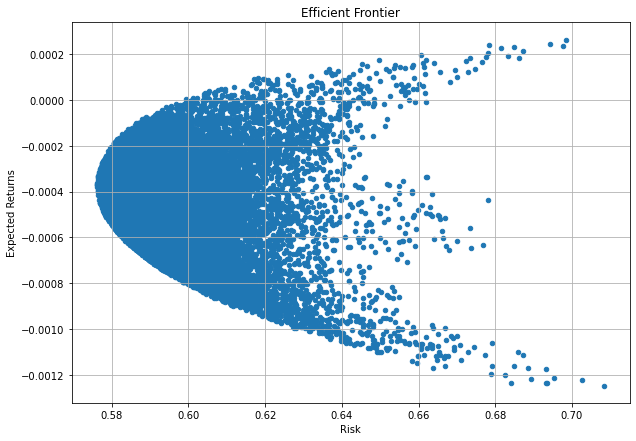

In [169]:
df.plot.scatter(x='Risk', y='Returns', figsize=(10,7), grid=True)
plt.title('Efficient Frontier')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.show()